## Neural Networks from scratch

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from models.neural_net import NeuralNetwork
from utils.data_process import get_FASHION_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading Fashion-MNIST

This is the dataset we will use to text our neural network. It consists of 10 classes of digits for recognition and classification.

In [148]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values
TRAIN_IMAGES = 50000
VAL_IMAGES = 10000
TEST_IMAGES = 10000

data = get_FASHION_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)

X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

## Train using SGD

In [343]:
# Hyperparameters
input_size = 784
num_layers = 2
hidden_size = 20
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 100
batch_size = 200
learning_rate = 3.5e-3
learning_rate_decay = 0.96
regularization = 0.1

# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

# Variables to store performance for each epoch
train_loss = np.zeros(epochs)
train_accuracy = np.zeros(epochs)
val_accuracy = np.zeros(epochs)

# For each epoch...
for epoch in range(epochs):
    print('epoch:', epoch)
    
    # Shuffle the dataset
    
    shuffle = list(zip(X_train, y_train))
    np.random.shuffle(shuffle)
    X_train_shuffled, y_train_shuffled = zip(*shuffle)
    X_train_shuffled, y_train_shuffled = np.array(X_train_shuffled), np.array(y_train_shuffled)

    # Training
    
    # Forward Pass
    scores = net.forward(X_train_shuffled)
    pred = np.argmax(scores, axis=1)
    train_accuracy[epoch] += (pred == y_train_shuffled).sum()
    train_accuracy[epoch] /= len(y_train_shuffled)
    
    # Backward Pass
    train_loss[epoch] += net.backward(y_train_shuffled, regularization)
    net.update(epoch + 1, learning_rate, 'SGD')
    
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        indices = np.random.choice(list(range(y_train.shape[0])), size = batch_size)
        X_batch = X_train_shuffled[indices, :]
        y_batch = y_train_shuffled[indices]
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
        scores_minibatch = net.forward(X_batch)
        pred_minibatch = np.argmax(scores_minibatch, axis=1)
        train_accuracy[epoch] += (pred_minibatch == y_batch).sum()
        train_accuracy[epoch] /= len(y_batch)
        
        # Run the backward pass of the model to compute the loss, and update the weights
        train_loss[epoch] += net.backward(y_batch, regularization)
        net.update(epoch + 1, learning_rate, 'SGD')

    # Validation
    val_scores = net.forward(X_val)
    val_pred = np.argmax(val_scores, axis = 1)
    
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_accuracy[epoch] += (val_pred == y_val).sum()
    val_accuracy[epoch] /= len(y_val)
    
    # Implement learning rate decay
    learning_rate *= learning_rate_decay

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50
epoch: 51
epoch: 52
epoch: 53
epoch: 54
epoch: 55
epoch: 56
epoch: 57
epoch: 58
epoch: 59
epoch: 60
epoch: 61
epoch: 62
epoch: 63
epoch: 64
epoch: 65
epoch: 66
epoch: 67
epoch: 68
epoch: 69
epoch: 70
epoch: 71
epoch: 72
epoch: 73
epoch: 74
epoch: 75
epoch: 76
epoch: 77
epoch: 78
epoch: 79
epoch: 80
epoch: 81
epoch: 82
epoch: 83
epoch: 84
epoch: 85
epoch: 86
epoch: 87
epoch: 88
epoch: 89
epoch: 90
epoch: 91
epoch: 92
epoch: 93
epoch: 94
epoch: 95
epoch: 96
epoch: 97
epoch: 98
epoch: 99


In [344]:
# Test
test_scores = net.forward(X_test)
test_pred_2 = np.argmax(test_scores, axis = 1)

# No need to run the backward pass here, just run the forward pass to compute accuracy
test_accuracy = (test_pred_2 == y_test).sum()/len(y_test)

In [345]:
print('Validation Accuracy on 2-layer SGD: {}'.format(round(val_accuracy.mean(), 4)))
print('Test Accuracy on 2-layer SGD: {}'.format(test_accuracy))

Validation Accuracy on 2-layer SGD: 0.8699
Test Accuracy on 2-layer SGD: 0.8708


## Train using Adam

In [333]:
# Hyperparameters
input_size = 784
num_layers = 2
hidden_size = 20
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 50
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
regularization = 0.1

# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

# Variables to store performance for each epoch
train_loss_a = np.zeros(epochs)
train_accuracy_a = np.zeros(epochs)
val_accuracy_a = np.zeros(epochs)

# For each epoch...
for epoch in range(epochs):
    print('epoch:', epoch)
    
    # Shuffle the dataset
    
    shuffle = list(zip(X_train, y_train))
    np.random.shuffle(shuffle)
    X_train_shuffled, y_train_shuffled = zip(*shuffle)
    X_train_shuffled, y_train_shuffled = np.array(X_train_shuffled), np.array(y_train_shuffled)

    # Training
    
    # Forward Pass
    scores = net.forward(X_train_shuffled)
    pred = np.argmax(scores, axis=1)
    train_accuracy_a[epoch] += (pred == y_train_shuffled).sum()
    train_accuracy_a[epoch] /= len(y_train_shuffled)
    
    # Backward Pass
    train_loss_a[epoch] += net.backward(y_train_shuffled, regularization)
    net.update(epoch + 1, learning_rate, 'ADAM')
    
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        indices = np.random.choice(list(range(y_train.shape[0])), size = batch_size)
        X_batch = X_train_shuffled[indices, :]
        y_batch = y_train_shuffled[indices]
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
        scores_minibatch = net.forward(X_batch)
        pred_minibatch = np.argmax(scores_minibatch, axis=1)
        train_accuracy_a[epoch] += (pred_minibatch == y_batch).sum()
        train_accuracy_a[epoch] /= len(y_batch)
        
        # Run the backward pass of the model to compute the loss, and update the weights
        train_loss_a[epoch] += net.backward(y_batch, regularization)
        net.update(epoch + 1, learning_rate, 'ADAM')

    # Validation
    val_scores = net.forward(X_val)
    val_pred = np.argmax(val_scores, axis = 1)
    
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_accuracy_a[epoch] += (val_pred == y_val).sum()
    val_accuracy_a[epoch] /= len(y_val)
    
    # Implement learning rate decay
    learning_rate *= learning_rate_decay

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49


In [334]:
# Test
test_scores = net.forward(X_test)
test_pred_2a = np.argmax(test_scores, axis = 1)

# No need to run the backward pass here, just run the forward pass to compute accuracy
test_accuracy_a = (test_pred_2a == y_test).sum()/len(y_test)

In [335]:
print('Validation Accuracy on 2-layer Adam: {}'.format(round(val_accuracy_a.mean(), 4)))
print('Test Accuracy on 2-layer Adam: {}'.format(test_accuracy_a))

Validation Accuracy on 2-layer Adam: 0.8545
Test Accuracy on 2-layer Adam: 0.8683


## Evaluation on the test set

In [339]:
best_2layer_sgd_prediction = test_pred_2
best_2layer_adam_prediction = test_pred_2a

## Compare SGD and Adam

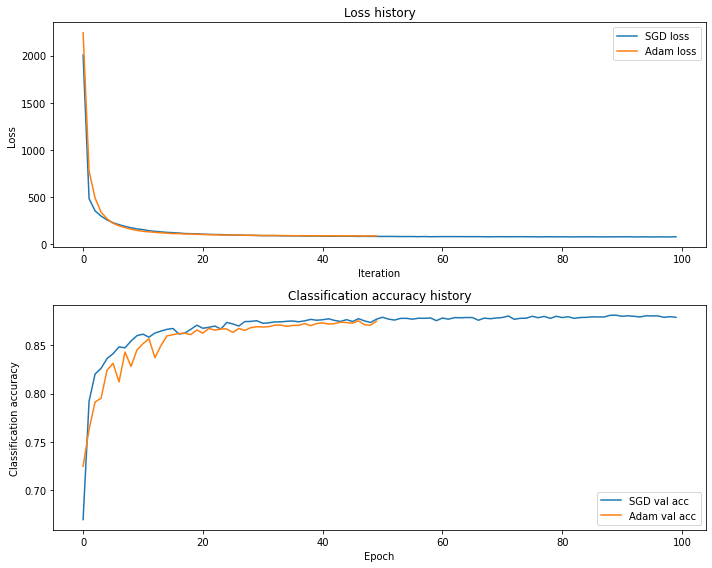

In [347]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss)
plt.plot(train_loss_a)
plt.legend(['SGD loss', 'Adam loss'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(val_accuracy, label='val SGD')
plt.plot(val_accuracy_a, label='val Adam')
plt.legend(['SGD val acc', 'Adam val acc'])
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')


plt.tight_layout()
plt.show()